IMPORTING PACKAGES (PlacedOrNot)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

IMPORTING THE DATASET

In [13]:
data=pd.read_csv("CPD.csv")
data.head()

,Serial No,Age,Gender,Stream,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA)
0,1,22,Female,Electronics And Communication,8,9,6,1,0,0,0
1,2,21,Female,Computer Science,7,8,9,0,1,1,7
2,3,22,Male,Information Technology,6,6,8,2,1,1,4
3,4,21,Female,Information Technology,8,9,9,2,0,1,12
4,5,22,Male,Mechanical,8,7,7,1,0,1,7


GENDER COLUMN BINARY CONVERSION

In [14]:
data['Gender'].replace(list(data['Gender'].unique()), range(len(data['Gender'].unique())), inplace=True)
data.head()

,Serial No,Age,Gender,Stream,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA)
0,1,22,0,Electronics And Communication,8,9,6,1,0,0,0
1,2,21,0,Computer Science,7,8,9,0,1,1,7
2,3,22,1,Information Technology,6,6,8,2,1,1,4
3,4,21,0,Information Technology,8,9,9,2,0,1,12
4,5,22,1,Mechanical,8,7,7,1,0,1,7


STREAM COLUMN DUMMY CODING

In [15]:
stream=pd.get_dummies(data['Stream'],drop_first=True)
data=pd.concat([data,stream],axis=1)
data.drop(['Stream'],axis=1,inplace=True)
data.head()

,Serial No,Age,Gender,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA),Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,22,0,8,9,6,1,0,0,0,0,0,1,0,0
1,2,21,0,7,8,9,0,1,1,7,1,0,0,0,0
2,3,22,1,6,6,8,2,1,1,4,0,0,0,1,0
3,4,21,0,8,9,9,2,0,1,12,0,0,0,1,0
4,5,22,1,8,7,7,1,0,1,7,0,0,0,0,1


DATA NORMALIZATION

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Age', 'CGPA','Coding Skills','Communication Skills','Internships']
data[num_vars] = scaler.fit_transform(data[num_vars])
data.head()

,Serial No,Age,Gender,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA),Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,0.2,0,0.75,1.0,0.4,0.5,0,0,0,0,0,1,0,0
1,2,0.1,0,0.50,0.8,1.0,0.0,1,1,7,1,0,0,0,0
2,3,0.2,1,0.25,0.4,0.8,1.0,1,1,4,0,0,0,1,0
3,4,0.1,0,0.75,1.0,1.0,1.0,0,1,12,0,0,0,1,0
4,5,0.2,1,0.75,0.6,0.6,0.5,0,1,7,0,0,0,0,1


DATA SPLIT

In [16]:
data.drop(['Serial No'],axis=1,inplace=True)

In [17]:
x=data.drop(['PlacedOrNot','Package Offered (LPA)'],axis=1)
y=data['PlacedOrNot']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
data.head()

,Age,Gender,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA),Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,0,8,9,6,1,0,0,0,0,0,1,0,0
1,21,0,7,8,9,0,1,1,7,1,0,0,0,0
2,22,1,6,6,8,2,1,1,4,0,0,0,1,0
3,21,0,8,9,9,2,0,1,12,0,0,0,1,0
4,22,1,8,7,7,1,0,1,7,0,0,0,0,1


LOGISTIC REGRESSION MODEL SCORE

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))
print("Accuracy of prediction :",metrics.accuracy_score(ytest, ypred))

Training Data Score :  0.9615686274509804
Testing Data Score :  0.9505882352941176
Accuracy of prediction : 0.9505882352941176


C:\Users\raami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DECISON TREE CLASSIFIER MODEL SCORE

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))
print("Accuracy of prediction : ",metrics.accuracy_score(ytest, ypred))
print(f'Depth = {model.get_depth()}')

Training Data Score :  0.9819607843137255
Testing Data Score :  0.971764705882353
Accuracy of prediction :  0.971764705882353
Depth = 5


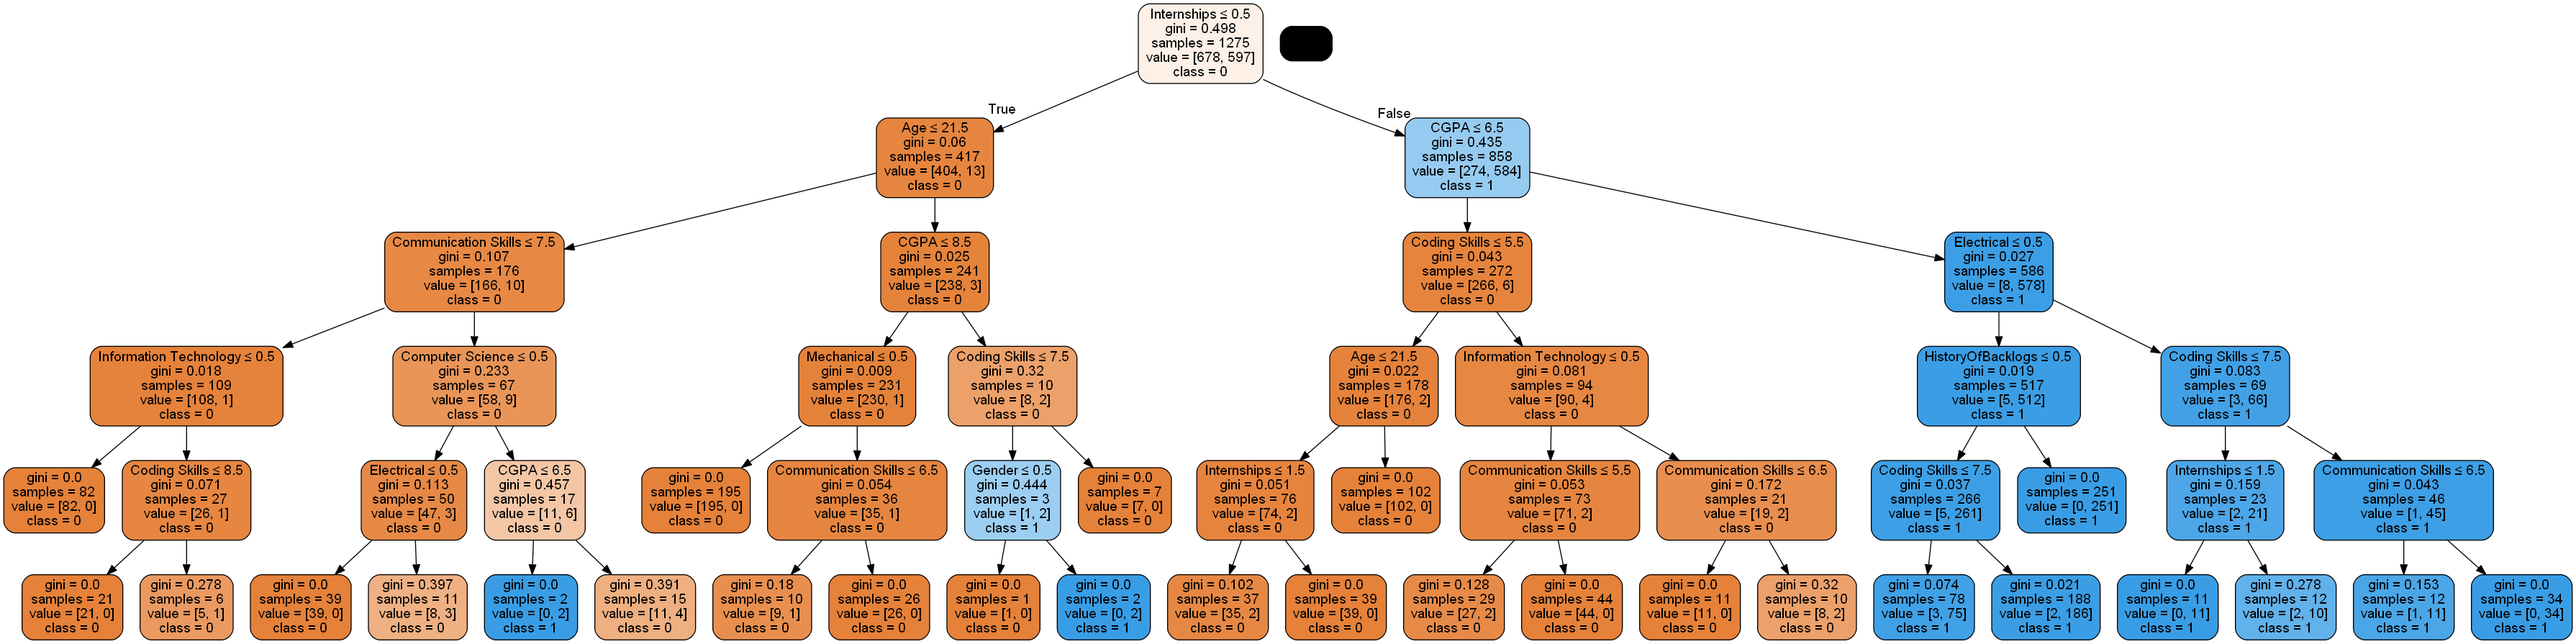

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(x.columns),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('CPP-PlDt.png')
Image(graph.create_png())

RANDOM FOREST CLASSIFIER MODEL SCORE

In [1]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='gini',n_estimators=5)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))
print("Accuracy of prediction :",metrics.accuracy_score(ytest, ypred))
print(f'Estimators = {model.n_estimators}')

NameError: name 'xtrain' is not defined

STORING THE MODEL

In [12]:
import pickle
pickle.dump(model,open('Placement.pkl','wb'))